
## K-fold Cross Validation
---

### k-fold cross-validation

In K-fold cross validation, the data is split into k groups. One group out of the k groups will be the test set, the rest (k-1) groups will be the training set. In the next iteration, another group will be the test set, and the rest will be the training set. The process repeats for k iterations (k-fold). In each fold, a metric for accuracy (MSE in this case) will be calculated and an overall average of that metric will be calculated over k-folds.

The advantage of this method over repeated random sub-sampling is that all observations are used for both training and validation, and each observation is used for validation exactly once. 10-fold cross-validation is commonly used, but in general k remains an unfixed parameter.

When k=n (the number of observations), the k-fold cross-validation is exactly the leave-one-out cross-validation.

In stratified k-fold cross-validation, the folds are selected so that the mean response value is approximately equal in all the folds. In the case of a dichotomous classification, this means that each fold contains roughly the same proportions of the two types of class labels.


### Cross-Validation

Cross-validation, sometimes called rotation estimation, is a model validation technique for assessing how the results of a statistical analysis will generalize to an independent data set. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice. In a prediction problem, a model is usually given a dataset of known data on which training is run (training dataset), and a dataset of unknown data (or first seen data) against which the model is tested (testing dataset). The goal of cross validation is to define a dataset to "test" the model in the training phase (i.e., the validation dataset), in order to limit problems like overfitting, give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem), etc.

** Common types of cross-validation **

** Exhaustive cross-validation**

Exhaustive cross-validation methods are cross-validation methods which learn and test on all possible ways to divide the original sample into a training and a validation set.

    Leave-p-out cross-validation
    Leave-one-out cross-validation

**Non-exhaustive cross-validation**

Non-exhaustive cross validation methods do not compute all ways of splitting the original sample. Those methods are approximations of leave-p-out cross-validation.

    k-fold cross-validation
    2-fold cross-validation
    Repeated random sub-sampling validation



### MSE mean_squared_error for the training data and the test data

R^2 is rescaled mean squared error

In regression analysis, the term mean squared error is sometimes used to refer to the unbiased estimate of error variance: the residual sum of squares divided by the number of degrees of freedom.

In regression analysis, "mean squared error", often referred to as mean squared prediction error or "out-of-sample mean squared error", can refer to the mean value of the squared deviations of the predictions from the true values, over an out-of-sample test space, generated by a model estimated over a particular sample space. This also is a known, computed quantity, and it varies by sample and by out-of-sample test space.

The mean squared error (MSE) or mean squared deviation (MSD) of an estimator measures the average of the squares of the errors or deviations, that is, the difference between the estimator and what is estimated. MSE is a risk function, corresponding to the expected value of the squared error loss or quadratic loss. The difference occurs because of randomness or because the estimator doesn't account for information that could produce a more accurate estimate.


$\operatorname{MSE}=\frac{1}{n}\sum_{i=1}^n(\hat{Y_i} - Y_i)^2$

**Mean**

$     \overline{X}=\frac{1}{n}\sum_{i=1}^n X_i $

which has an expected value equal to the true mean $μ$ (so it is unbiased) and a mean square error of

$    {\displaystyle \operatorname {MSE} \left({\overline {X}}\right)=\operatorname {E} \left[\left({\overline {X}}-\mu \right)^{2}\right]=\left({\frac {\sigma }{\sqrt {n}}}\right)^{2}={\frac {\sigma ^{2}}{n}}}$

where $ {\displaystyle \sigma ^{2}}$ is the population variance.

For a Gaussian distribution this is the best unbiased estimator (that is, it has the lowest MSE among all unbiased estimators), but not, say, for a uniform distribution.

**Model Performance - Root Mean Square Error**

The root-mean-square deviation (RMSD) or root-mean-square error (RMSE) is a frequently used measure of the differences between values (sample and population values) predicted by a model or an estimator and the values actually observed. 

The RMSD represents the sample standard deviation of the differences between predicted values and observed values. These individual differences are called residuals when the calculations are performed over the data sample that was used for estimation, and are called prediction errors when computed out-of-sample. 

The RMSD serves to aggregate the magnitudes of the errors in predictions for various times into a single measure of predictive power. RMSD is a good measure of accuracy, but only to compare forecasting errors of different models for a particular variable and not between variables, as it is scale-dependent.

The RMSD of an estimator ${\displaystyle {\hat {\theta }}} $with respect to an estimated parameter $ {\displaystyle \theta }$ is defined as the square root of the mean square error:

$\operatorname{RMSD}(\hat{Y}) = \sqrt{\operatorname{MSE}(\hat{Y})}$

where:

$\operatorname{MSE}=\frac{1}{n}\sum_{i=1}^n(\hat{Y_i} - Y_i)^2$


**For an unbiased estimator, the RMSD is the square root of the variance, known as the standard deviation.**


### Learning Curves

Training 3 examples will easily have 0 errors because we can always find a quadratic curve that exactly touches 3 points.

As the training set gets larger, the error for a quadratic function increases.
The error value will plateau out after a certain m, or training set size.

**With high bias**

**Low training set size:** causes $Jtrain(Θ)$ to be low and $JCV(Θ)$ to be high.

**Large training set size:** causes both $Jtrain(Θ)$ and $JCV(Θ)$ to be high with $Jtrain(Θ)≈JCV(Θ).$

If a learning algorithm is suffering from **high bias**, getting more training data **will not (by itself) help much.**

For high variance, we have the following relationships in terms of the training set size:

With high variance

**Low training set size:** $Jtrain(Θ)$ will be low and $JCV(Θ)$ will be high.

**Large training set size:** Jtrain(Θ) increases with training set size and $JCV(Θ)$ continues to decrease without leveling off. Also, $Jtrain(Θ <JCV(Θ)$ but the difference between them remains significant.

If a learning algorithm is suffering from **high variance**, getting more training data is likely to help.


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import mean_squared_error as MSE


from sklearn.datasets import load_boston

import numpy as np
import pandas as pd
% matplotlib inline

In [3]:
boston = load_boston()

In [4]:
features = boston.data
features[:2]

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00,
          0.00000000e+00,   5.38000000e-01,   6.57500000e+00,
          6.52000000e+01,   4.09000000e+00,   1.00000000e+00,
          2.96000000e+02,   1.53000000e+01,   3.96900000e+02,
          4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00,
          0.00000000e+00,   4.69000000e-01,   6.42100000e+00,
          7.89000000e+01,   4.96710000e+00,   2.00000000e+00,
          2.42000000e+02,   1.78000000e+01,   3.96900000e+02,
          9.14000000e+00]])

In [5]:
target = boston.target
target[:2]

array([ 24. ,  21.6])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
train_predicted = model.predict(X_train)


In [46]:
test_predicted = model.predict(X_test)

In [48]:
mse_train = MSE(y_train, train_predicted)
mse_test = MSE(y_test, test_predicted)


In [49]:
rmse_train = (mse_train)**0.5
rmse_test = (mse_test)**0.5

---
**Functions**

In [10]:
def mse(target, predicted):
    mse = (predicted - target)**2
    return mse.sum()/len(predicted)

Having in real life a limited set of data this is the only way to evaluate how well different models perform against each other. Ultimately I want to quantify how good the model is on 'unseen' data, not how good a fit it is to available data. Using a test set it's a way to simulate this.

In [15]:
def rmse(target, prediction):
    ''' Compute Root-mean-squared-error '''
    rmse = MSE(target, prediction)**0.5
    return rmse

In [17]:
def rmse_train_predicted(xtrain, ytrain, xtest, ytest ):
    ''' Calculate linear regression on the features to predict target'''
    model = LinearRegression()
    model.fit(xtrain, ytrain)
    
    train_prediction = model.predict(xtrain)
    test_prediction = model.predict(xtest)
    
    rmse_train = rmse(ytrain, train_prediction)
    rmse_prediction = rmse(ytest, test_prediction)
    
    return rmse_train, rmse_prediction


In [18]:
rmse_train_predicted(train_features, train_target, test_features, test_target)

(4.5307296210339416, 5.1376235426119461)

In [33]:
def kfold_cverror(features, target):
    ''' Returns error for k-fold cross validation. '''
    error_model, index, num_folds = 0, 0, 10

    attributes = len(features)
    k_fold = KFold(attributes, n_folds= num_folds)
    cv_error = np.empty(num_folds)
    model =LinearRegression()

    for train, test in k_fold:
        model.fit(features[train], target[train])
        prediction = model.predict(features[test])
        cv_error[index] = rmse(target[test], prediction)
        index +=1
        
    return np.mean(cv_error)

In [34]:
kfold_cverror(features, target)

5.1856464865670668

In [60]:
def plot_learning_curve(model, target, features, label='None'):
    ''' Plot learning curve with varying training sizes'''
    
    scores = []
    training_size = np.linspace(10, 300, 10).astype(int)
    
    for train_size in training_size:
        cv_shuffle = ShuffleSplit(train_size=train_size,
                                  test_size=200, n=len(target),
                                  random_state=0)
        
        cv_score = cross_val_score(model, features,
                                    target, cv=cv_shuffle)
        scores.append(cv_score)
        
    plt.plot(training_size, np.mean(scores, axis=1), label=label or estimator.__class__.__name__)
    plt.ylim(0,1)
    plt.ylabel('Average Training Error - CV score')
    plt.xlabel('Training test size')
    plt.legend(loc='best')
    plt.show()

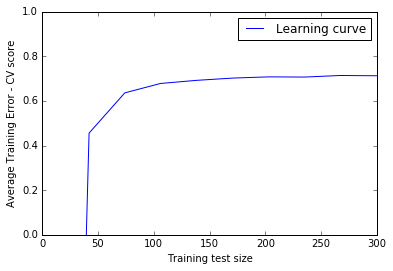

In [58]:
model = LinearRegression()
plot_learning_curve(model,  target, features, label='Learning curve')

In [71]:
model = LinearRegression()
cv_score = cross_val_score(model, X_train,y_train)
cv_score

array([ 0.60799758,  0.74280385,  0.70796891])

In [74]:
len(X_train)

354

In [98]:
def plt_learning_curve(model, features, target, label='None'):
    ''' Plot learning curve with varying training sizes
    The sum of train_size and test_size = 367, 
    should be smaller than the number of samples 354. 
    Reduce test_size and/or train_size. -->250
    np.linspace(10, 250, 10)
    '''
    
    scores = []
    training_size = np.linspace(10, 250, 10).astype(int)
    
    for train_size in training_size:
        cv_shuffle = ShuffleSplit(train_size=train_size,
                                  test_size=100, n=len(target),
                                  random_state=0)
        
        cv_score = cross_val_score(model, features,
                                    target, cv=cv_shuffle)
        scores.append(cv_score)
        
    plt.plot(training_size, np.mean(scores, axis=1), label=label or estimator.__class__.__name__)
    plt.ylim(0,1)
    plt.ylabel('Average Training Error - CV score')
    plt.xlabel('Training test size')
    plt.legend(loc='best')
    plt.show()

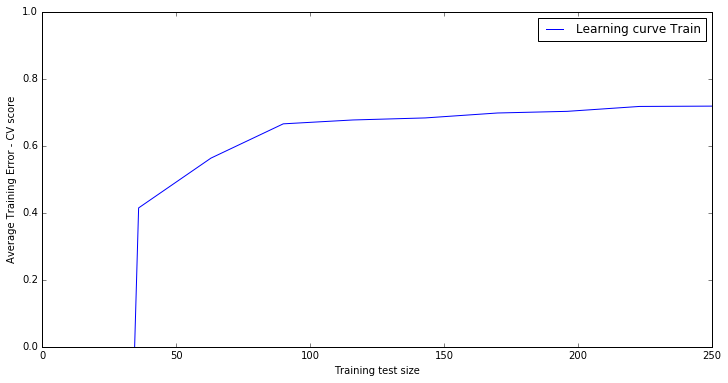

In [99]:
plt.figure(figsize=(12, 6))
model = LinearRegression()
plt_learning_curve(model, X_train, y_train, label= 'Learning curve Train')
plt.show()

In [118]:
def plot_test_train_errors(features, X_train, X_test, y_train, y_test):
    feature = features.shape[1] # Feature columns qty
    train_RMSE_error, test_RMSE_error = [], []
    model = LinearRegression()
    
    for feat in xrange(feature): # item feature per column
        model.fit(X_train[:,:(feat + 1)], y_train)
   
        train_predicted = model.predict(X_train[:,:(feat + 1)])
        test_predicted = model.predict(X_test[:,:(feat + 1)])
        
        train_RMSE_error.append(rmse(y_train, train_predicted))
        test_RMSE_error.append(rmse(y_test, test_predicted))
        
           
    x = range(feature)
    plt.figure()
    plt.plot(x, test_RMSE_error, label='Test error - RMSE')
    plt.plot(x, train_RMSE_error, label='Training error - RMSE')
    plt.xlabel('Number of Features - attributes')
    plt.ylabel('RMSE - Root mean squared error')
    plt.legend()
    plt.show()

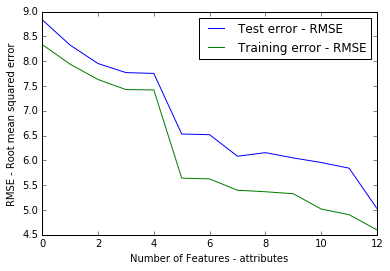

In [119]:
plot_test_train_errors(features, X_train, X_test, y_train, y_test)

---
Stepwise Regression

In [120]:
crossval_k = []
for k in range(2,15):
    crossval_k.append(cross_val_score(LinearRegression() , features, y = target, cv =k, scoring='neg_mean_squared_error').mean()*(-1))

In [121]:
crossval_k

[164.94652620279882,
 168.6466536058808,
 42.489469527487856,
 37.222843637138403,
 39.11032336957846,
 36.859219426421028,
 32.113552425694678,
 34.380044547677471,
 34.763091505422622,
 31.824885951982552,
 33.538947192200929,
 32.592514977731824,
 30.800594636662957]

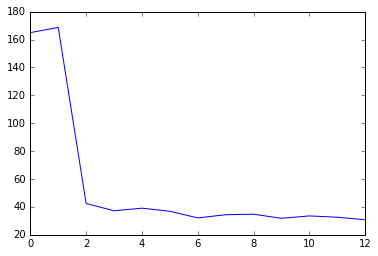

In [122]:
plt.plot(crossval_k);